<a href="https://colab.research.google.com/github/manishramamoorthy/New-Machine-Learning-Projects/blob/main/Project_8_Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Summary :**

1) Importing Libraries                 
2) Loading Dataset                         
3) Data PreProcessing                               
4) EDA (Exploratory Data Analysis)                               
5) Train and Test Split                                  
6) Standard Scaler                                 
7) Modelling                                 
8) Making Prediction                                
9) Compare Actual and Predicted Scores                            
10) Evaluation Metrics                                     

**1) Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,plot_roc_curve,roc_curve,roc_auc_score,confusion_matrix,f1_score

**2) Loading Dataset**

In [2]:
loan_status_data = pd.read_csv("/content/Loan status Prediction.csv")

**3) Data PreProcessing**

1) Top Five Rows of DataSet

In [3]:
loan_status_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


2) Last Five Rows of DataSet

In [4]:
loan_status_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


3) Shape of DataSet

In [5]:
loan_status_data.shape
print("Number of Rows: ",loan_status_data.shape[0])
print("Number of Columns: ",loan_status_data.shape[1])

Number of Rows:  614
Number of Columns:  13


4) data Types

In [6]:
loan_status_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

5) Getting Information of DataSet

In [7]:
loan_status_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


6) Checking Missing Values of DataSet

In [8]:
loan_status_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Filling Missing values in Gender

In [9]:
loan_status_data["Gender"] = loan_status_data["Gender"].fillna(loan_status_data["Gender"].mode()[0])

Filling Missing values in Married

In [10]:
loan_status_data["Married"] = loan_status_data["Married"].fillna(loan_status_data["Married"].mode()[0])

Filling Missing values in Dependents

In [11]:
loan_status_data = loan_status_data.replace(to_replace="3+",value=4)

In [12]:
loan_status_data["Dependents"] = loan_status_data["Dependents"].fillna(loan_status_data["Dependents"].mode()[0])

Filling Missing values in Self Employed

In [13]:
loan_status_data["Self_Employed"] = loan_status_data["Self_Employed"].fillna(loan_status_data["Self_Employed"].mode()[0])

Filling Missing values in Loan Amount

In [14]:
loan_status_data["LoanAmount"] = loan_status_data["LoanAmount"].fillna(loan_status_data["LoanAmount"].mean())

Filling Missing values in Loan Amount Term

In [15]:
loan_status_data["Loan_Amount_Term"] = loan_status_data["Loan_Amount_Term"].fillna(loan_status_data["Loan_Amount_Term"].mean())

Filling Missing values in Credict History





In [16]:
loan_status_data["Credit_History"] = loan_status_data["Credit_History"].fillna(loan_status_data["Credit_History"].mode()[0])

In [17]:
loan_status_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

7) Droping Duplicates Values of Dataset

In [18]:
loan_status_data = loan_status_data.drop_duplicates()

8) Encoding Data

 Convert Gender Categorical Value to Numerical Value

In [19]:
loan_status_data["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [20]:
loan_status_data["Gender"] = loan_status_data["Gender"].map({"Male":0,"Female":1})

Convert Married Categorical Value to Numerical Value

In [21]:
loan_status_data["Married"].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
loan_status_data["Married"] = loan_status_data["Married"].map({"No":0,"Yes":1})

Convert Education Categorical Value to Numerical Value

In [23]:
loan_status_data["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [24]:
loan_status_data["Education"] = loan_status_data["Education"].map({"Graduate":1,"Not Graduate":0})

Convert Self Employed Categorical Value to Numerical Value

In [25]:
loan_status_data["Self_Employed"].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
loan_status_data["Self_Employed"] = loan_status_data["Self_Employed"].map({"No":0,"Yes":1})

Convert Property Area Categorical Value to Numerical Value

In [27]:
loan_status_data["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [28]:
loan_status_data["Property_Area"] = loan_status_data["Property_Area"].map({"Urban":1,"Rural":2,"Semiurban":3})

Convert Loan Status Categorical Value to Numerical Value

In [29]:
loan_status_data["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [30]:
loan_status_data["Loan_Status"] = loan_status_data["Loan_Status"].map({"Y":1,"N":0})

9) Statistical Measures

In [31]:
loan_status_data.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.182410,0.653094,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.855049,2.050489,0.687296
std,0.386497,0.476373,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.840875,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,2.000000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,3.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,3.000000,1.000000


10) IQR (Inter Quantile Range)

    IQR = Q3-Q1           
    Upper Threshold = Q3 + (1.5 * IQR)
    Lower Threshold = Q1 - (1.5 * IQR) 

Applicant Income

In [32]:
IQR = loan_status_data.ApplicantIncome.quantile(0.75) - loan_status_data.ApplicantIncome.quantile(0.25)
Upper_Threshold = loan_status_data.ApplicantIncome.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = loan_status_data.ApplicantIncome.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  10171.25
Lower_Threshold :  -1498.75


Coapplicant Income

In [33]:
IQR = loan_status_data.CoapplicantIncome.quantile(0.75) - loan_status_data.CoapplicantIncome.quantile(0.25)
Upper_Threshold = loan_status_data.CoapplicantIncome.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = loan_status_data.CoapplicantIncome.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  5743.125
Lower_Threshold :  -3445.875


Loan Amount

In [34]:
IQR = loan_status_data.LoanAmount.quantile(0.75) - loan_status_data.LoanAmount.quantile(0.25)
Upper_Threshold = loan_status_data.LoanAmount.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = loan_status_data.LoanAmount.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  261.5
Lower_Threshold :  3.5


Loan Amount Term

In [35]:
IQR = loan_status_data.	Loan_Amount_Term.quantile(0.75) - loan_status_data.	Loan_Amount_Term.quantile(0.25)
Upper_Threshold = loan_status_data.	Loan_Amount_Term.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = loan_status_data.	Loan_Amount_Term.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  360.0
Lower_Threshold :  360.0


**4) EDA (Exploratory Data Analysis)**

In [36]:
loan_status_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Text(0.5, 1.0, 'Loan Amount vs Applicant Income')

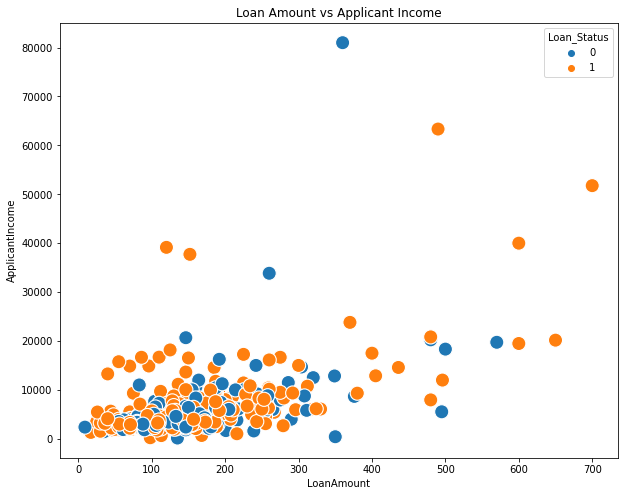

In [37]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="LoanAmount",y="ApplicantIncome",hue="Loan_Status",data=loan_status_data,s=200)
plt.title("Loan Amount vs Applicant Income")

**5) Train and Test Split**

In [38]:
del loan_status_data["Loan_ID"]

In [39]:
X = loan_status_data.drop(columns="Loan_Status",axis=1)
y = loan_status_data["Loan_Status"]

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=7)

**6) Standard Scaler**

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 2.13123642, -1.36277029,  0.15497627, ...,  0.26494169,
         0.41289643,  1.12674454],
       [-0.4692112 , -1.36277029, -0.69370332, ...,  0.26494169,
        -2.42191487, -1.26174619],
       [-0.4692112 ,  0.73379939,  2.70101507, ..., -2.50490322,
         0.41289643, -0.06750083],
       ...,
       [ 2.13123642, -1.36277029, -0.69370332, ...,  0.26494169,
         0.41289643, -1.26174619],
       [ 2.13123642, -1.36277029, -0.69370332, ...,  0.26494169,
         0.41289643,  1.12674454],
       [-0.4692112 , -1.36277029,  0.15497627, ...,  0.26494169,
         0.41289643,  1.12674454]])

**7) Modelling**

1) Support Vector Machine

In [42]:
from sklearn import svm
svm = svm.SVC(kernel="linear")
svm.fit(X_train,y_train)

SVC(kernel='linear')

2) Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
ran_fore = RandomForestClassifier()
ran_fore.fit(X_train,y_train)

RandomForestClassifier()

**8) Making Prediction**

1) Support Vector Machine

In [44]:
svm.coef_

array([[-1.82632543e-01,  4.12023858e+00, -5.03086588e-02,
         2.65008301e+00,  1.00000000e+00,  1.22295714e-03,
         2.09023576e-04, -2.62234604e-02,  1.10648617e-02,
         2.29927553e+01,  3.50091834e+00]])

In [45]:
svm.intercept_

array([-27.96605381])

In [46]:
svm.predict([[1,1,0,1,0,4583,2358,141.000000,360.0,1.0,2]])

array([1])

2) Random Forest Classifier

In [47]:
ran_fore.predict([[1,1,0,1,0,4583,2358,141.000000,360.0,1.0,2]])

array([1])

**9) Compare Actual and Predicted Scores**

1) Support Vector Machine

In [48]:
y_pred_1 = svm.predict(X_test)
y_pred_1

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [49]:
df = pd.DataFrame({"Actual": y_test,"Prediction" :y_pred_1})
df

,Actual,Prediction
410,0,1
438,0,0
610,1,1
10,1,1
365,0,1
...,...,...
28,0,1
511,1,1
568,0,1
210,0,1


2) Random Forest Classifier

In [50]:
y_pred_2 = ran_fore.predict(X_test)
y_pred_2

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [51]:
df = pd.DataFrame({"Actual": y_test,"Prediction" :y_pred_2})
df

,Actual,Prediction
410,0,1
438,0,0
610,1,1
10,1,1
365,0,1
...,...,...
28,0,1
511,1,1
568,0,1
210,0,1


**10) Evaluation Metrics**

In [52]:
from sklearn.metrics import accuracy_score,plot_roc_curve,roc_curve,roc_auc_score,confusion_matrix,f1_score

1) Support Vector Machine

In [53]:
# Accuracy Score
Accuracy_Score = svm.score(X_test,y_test)
print("Accuarcy Score of a Test Data: ",Accuracy_Score)

Accuarcy Score of a Test Data:  0.7792207792207793


In [54]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_1)

array([[ 17,  31],
       [  3, 103]])

In [55]:
# f1 score
F1_Score = f1_score(y_test,y_pred_1)
print("f1 Score of Test Data: ",F1_Score)

f1 Score of Test Data:  0.8583333333333334


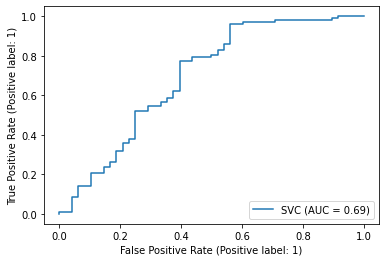

In [56]:
# AUROC Score
plot_roc_curve(svm,X_test,y_test)

2) Random Forest Classifier

In [57]:
# Accuracy Score
Accuracy_Score = ran_fore.score(X_test,y_test)
print("Accuarcy Score of a Test Data: ",Accuracy_Score)

Accuarcy Score of a Test Data:  0.7532467532467533


In [58]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_2)

array([[18, 30],
       [ 8, 98]])

In [59]:
# f1 score
F1_Score = f1_score(y_test,y_pred_2)
print("f1 Score of Test Data: ",F1_Score)

f1 Score of Test Data:  0.8376068376068376


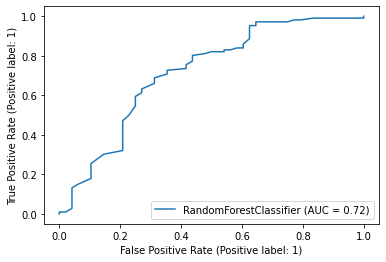

In [60]:
# AUROC Score
plot_roc_curve(ran_fore,X_test,y_test)